> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** Igor Lucas dos Santos Braz
* **Matrícula:**  3865

# Aula Prática 10
## Aprendizado de Máquina Não-Supervisionado - Clustering
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado não-supervisionado

**Pré-requisitos:** Linguagem de programação Python, Linux, estatística

**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de agrupamento

In [ ]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets, cluster

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_10 import *

print("Setup complete.")

------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

In [ ]:
X_columns = [u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)', u'petal width (cm)']
X = iris_df[X_columns]

### Visualizar os dados

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Agrupar os dados utilizando o `K-Means`

Com 3 clusters.

In [ ]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

### Comparar os centros das classes reais com os grupos identificados pelo k-means

**Atenção:** a ordem dos grupos do k-means não é necessariamente a mesma do target (0, 1 e 2). Temos que olhar para um grupo, independente da ordem do label que o k-means atribuiu.

In [ ]:
print(k_means.cluster_centers_)

iris_df.groupby('target')[X_columns]

### Visualizar os grupos em termos de dois atributos
**Atenção**: as cores dos dois gráficos podem ser diferentes, pois o rótulo do agrupamento do k-means pode não ser igual ao do target real. Nesses gráficos, o objetivo é visualizar os grupos, sem se atentar para a cor.

In [ ]:
# Ajusta o tamanho do gráfico a ser plotado
plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[iris_df[u'target']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina supervisionado para criar modelos para prever o tipo de precipitação (Precip Type) de acordo com outras variáveis. Teste pelo menos três algoritmos e responda:

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`. 

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [ ]:
# q1.hint()

df = pd.read_csv('/content/weatherHistory.csv')

q1.check()

In [ ]:
df

In [ ]:
df['Precip Type'] = df['Precip Type'].apply(lambda x: 1 if x == 'rain' else 0)
df = df[['Precip Type','Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]
#precipType

## 2. Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de precipitação. 

Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

In [ ]:
# Resposta da 2


X_columns = [u'Temperature (C)',u'Apparent Temperature (C)', u'Humidity',	u'Wind Speed (km/h)',	u'Wind Bearing (degrees)',	u'Visibility (km)',	u'Loud Cover',u'Pressure (millibars)']
X = df[X_columns]

q2.hint()
q2.hint(2)

In [ ]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

In [ ]:
print(k_means.cluster_centers_)
df.groupby('Precip Type')[X_columns]

## 3. Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.
Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [ ]:
# Resposta da 3

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df[u'Humidity'], y=df[u'Wind Speed (km/h)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Wind Speed (km/h)'], y=df['Humidity'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel("Humidity")


plt.show()


q3.hint()

In [ ]:
plt.figure(figsize=(14, 7))



plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Temperature (C)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Temperature (C)'], y=df['Humidity'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Humidity")


plt.show()

Com isso, não foi vista nenhuma relação entre os dados reais com os k-means.

## 4. Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais adequados para agrupar os dados

Explore **pelo menos** quatro cenários distintos. Utilize o [cálculo da silhueta](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) para verificar a qualidade dos grupos obtidos. 

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [ ]:
q4.hint()
q4.hint(2)

var = df.copy()
var['Rotulo'] = k_means.labels_
plt.figure(figsize=(10,10))
pearson = var.corr()
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.show()

### Resposta da 4: - Cenário 1

**Cenário:** Temperature(C)/Humidity

**Justificativa:** Como mostra acima, as duas colunas possuem uma relação

In [ ]:
# Resposta da 4: - Cenário 1
# Faça o código do primeiro Cenário da 4. aqui!

col = ['Temperature (C)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[col])

In [ ]:
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Temperature (C)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Temperature (C)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Humidity")

plt.show()



In [ ]:
#Silhueta:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
silhueta = metrics.silhouette_score(df, k_means.labels_)
silhueta

0.029276320494073683

### Resposta da 4: - Cenário 2

**Cenário:** Apparent Temperature(C)/Humidity

**Justificativa:** Como mostra acima, as duas colunas possuem uma relação

In [ ]:
col = ['Apparent Temperature (C)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[col])

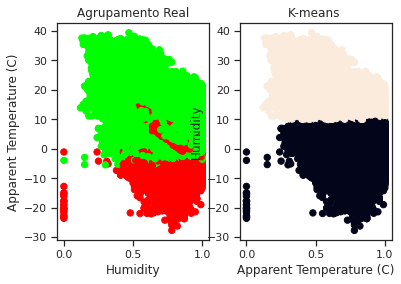

In [ ]:
# Resposta da 4: - Cenário 2
# Faça o código do segundo Cenário da 4. aqui!

plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Apparent Temperature (C)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Apparent Temperature (C)'], c=k_means.labels_, s=40)
plt.title('K-means ')
plt.xlabel('Apparent Temperature (C)')
plt.ylabel("Humidity")

plt.show()

In [ ]:
silhueta = metrics.silhouette_score(df,k_means.labels_)
silhueta

0.03084623556215587

### Resposta da 4: - Cenário 3

**Cenário:** Visibility/Humidity

**Justificativa:** Como mostra acima, as duas colunas possuem uma relação

In [ ]:
# Resposta da 4: - Cenário 3
# Faça o código do terceiro Cenário da 4. aqui!

col = ['Visibility (km)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[col])


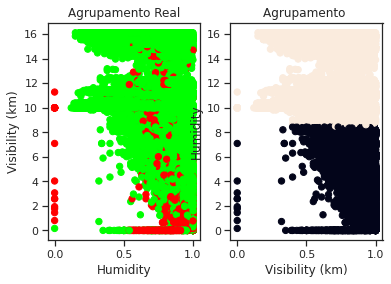

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Visibility (km)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Visibility (km)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Visibility (km)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Visibility (km)')
plt.ylabel("Humidity")

plt.show()

In [ ]:
silhueta = metrics.silhouette_score(df,k_means.labels_)
silhueta

0.03717791314984683

### Resposta da 4: - Cenário 4

**Cenário:** Humidity/Wind Speed (km/h)

**Justificativa:** Como mostra acima, as duas colunas possuem uma relação

In [ ]:
# Resposta da 4: - Cenário 4
# Faça o código do quarto Cenário da 4. aqui!


col = ['Wind Speed (km/h)', 'Humidity']
k_means = cluster.KMeans(n_clusters = 2).fit(df[col])

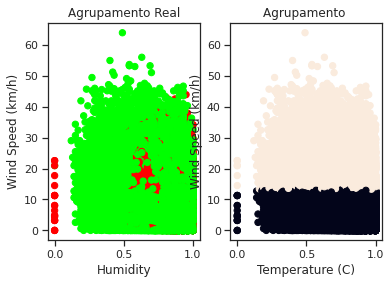

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Wind Speed (km/h)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Wind Speed (km/h)'], c=k_means.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Wind Speed (km/h)")

plt.show()

In [ ]:
silhueta = metrics.silhouette_score(df,k_means.labels_)
silhueta

0.027078015550172016

## 5. A partir dos resultados da Questão 4. é possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais?
Justifique sua resposta completamente.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Resposta da 5

Das analises, temos:



*   Humidity/Wind Speed (km/h) - 0.027078015550172016
*   Visibility/Humidity - 0.03717791314984683
*   Temperature(C)/Humidity - 0.029276320494073683
*   Apparent Temperature(C)/Humidity - 0.03084623556215587

O melhor cenário é Humidity/Wind Speed(km/h) e o pior é o Visibility/Humidity.





In [ ]:
q5.hint()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica:</span> Compare os valores do teste da silhueta, quais os melhores? E os piores, por que são piores?

## 6. Quais métricas você pode usar para validar a acurácia do K-Means?
Justifique sua resposta completamente

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

### Resposta da 6.
Utilizando train_test_split, temos:


In [ ]:
q6.hint()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df[['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']],
    var,
    test_size=0.3,
    random_state=0
)

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Dica:</span> Pesquise a resposta e verifique se já existe alguma função pronta nas bibliotecas utilizadas pra facilitar sua vida.

In [ ]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train)

acuracia = np.sum(k_means == Y_test)/len(Y_test)
acuracia

Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Rotulo                      0.0
dtype: float64

## 7. Pesquise outro algoritmo de aprendizado não-supervisionado para *clustering*, aplique para a mesma base, e compare com o K-Means
Coloque todo o código do outro algoritmo e explique completamente a sua comparação.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

### Resposta da 7.
{{ ESCREVA AQUI }}

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

In [ ]:
X_columns = [u'Temperature (C)',u'Apparent Temperature (C)', u'Humidity',	u'Wind Speed (km/h)',	u'Wind Bearing (degrees)',	u'Visibility (km)',	u'Loud Cover',u'Pressure (millibars)']
X = df[X_columns]

In [ ]:
cluster = DBSCAN(eps=3,min_samples=2).fit(X)
cluster.labels_
cluster
print(cluster)

DBSCAN(eps=3, min_samples=2)


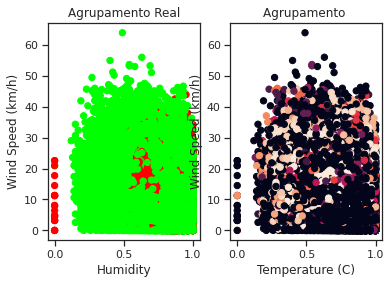

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(x=df[u'Humidity'], y=df[u'Wind Speed (km/h)'], c=cmap_real[df['Precip Type']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Humidity'], y=df['Wind Speed (km/h)'], c=cluster.labels_, s=40)
plt.title('Agrupamento ')
plt.xlabel('Temperature (C)')
plt.ylabel("Wind Speed (km/h)")


plt.show()

In [ ]:
silhueta = metrics.silhouette_score(df,cluster.labels_)
silhueta

-0.4742303977145417